# *Optymalizacja wielokryterialna 2024/25*
##### ƒÜwiczenie 3: Najwa≈ºniejsze metody skalaryzacji
##### Autorzy: Andrzej Janik, Artur Mazurkiewicz
##### Automatyka i Robotyka: Informatyka w Sterowaniu i ZarzƒÖdzaniu

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Wstƒôp

Celem tego zadania by≈Ço zapoznanie siƒô z trzema podstawowymi metodami skalaryzacji, kt√≥re s≈Çu≈ºƒÖ do wyznaczania zbioru punkt√≥w oraz ocen niezdominowanych w kontek≈õcie problem√≥w optymalizacji wielokryterialnej. 

Analizowane metody skalaryzacji to:
- Skalaryzacja przy u≈ºyciu funkcji liniowej.
- Skalaryzacja metodƒÖ ùúñ‚Äìogranicze≈Ñ.
- Skalaryzacja poprzez obliczanie odleg≈Ço≈õci do wybranego punktu dominujƒÖcego.

# Czƒô≈õƒá pierwsza
Czƒô≈õƒá pierwsza ƒáwiczenia polega≈Ça na analizie problemu dwukryterialnego z nieliniowymi, wybranymi przez nas funkcjami celu:
$$ F_1(x, y) = x^2 - y^2 $$
$$ F_2(x, y) = x^2 + y^2 $$

Zdefiniowany zosta≈Ç zbi√≥r rozwiƒÖza≈Ñ dopuszczalnych, bedƒÖcy elipsƒÖ o ≈õrodku w punktach (5,5) i promieniach r√≥wnych (1,1).

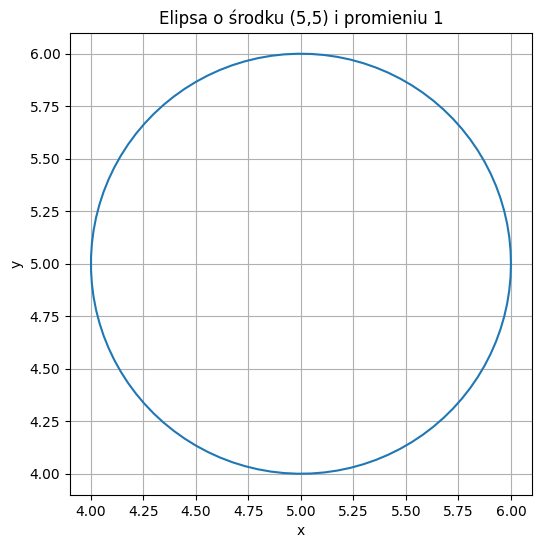

In [11]:
# Parametry elipsy
center_x, center_y = 5,5  # ≈örodek elipsy
radius_x, radius_y = 1, 1  # Promienie na osiach x i y (w tym przypadku elipsa o promieniu 1)

# Generowanie punkt√≥w dla elipsy
t = np.linspace(0, 2 * np.pi, 100)
x_vals = center_x + radius_x * np.cos(t)
y_vals = center_y + radius_y * np.sin(t)

# Rysowanie elipsy
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Elipsa o ≈õrodku (5,5) i promieniu 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


Zdefiniowane przez nas nieliniowe funkcje przekszta≈ÇcajƒÖ powy≈ºszy zbi√≥r rozwiƒÖza≈Ñ do wypuk≈Çego zbioru przedstawionego poni≈ºej.

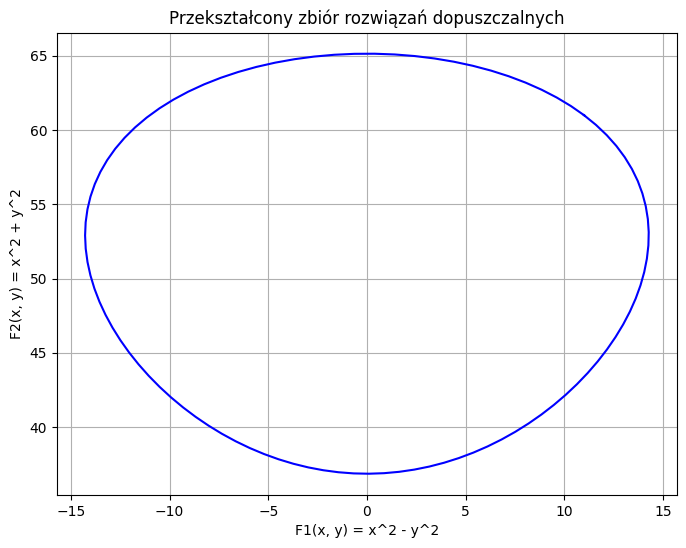

In [12]:
# Parametry elipsy
center_x, center_y = 5,5  # ≈örodek elipsy
radius_x, radius_y = 1, 1  # Promienie na osiach x i y (w tym przypadku elipsa o promieniu 1)

# Generowanie punkt√≥w dla elipsy
t = np.linspace(0, 2 * np.pi, 100)
x_vals = center_x + radius_x * np.cos(t)
y_vals = center_y + radius_y * np.sin(t)

# Definicja funkcji celu
def objectives(x, y):
    f1 = x ** 2 - y ** 2
    f2 = x ** 2 + y ** 2
    return f1,  f2

# Obliczanie warto≈õci funkcji celu dla wszystkich punkt√≥w elipsy
f1_vals = []
f2_vals = []
for x, y in zip(x_vals, y_vals):
    f1, f2 = objectives(x, y)
    f1_vals.append(f1)
    f2_vals.append(f2)

# Rysowanie wykresu dla uzyskanych warto≈õci F1 i F2
plt.figure(figsize=(8, 6))
plt.plot(f1_vals, f2_vals, color='blue')
plt.title("Przekszta≈Çcony zbi√≥r rozwiƒÖza≈Ñ dopuszczalnych")
plt.xlabel("F1(x, y) = x^2 - y^2")
plt.ylabel("F2(x, y) = x^2 + y^2")
plt.grid(True)
plt.show()


## Skalaryzacja przez funkcjƒô liniowƒÖ
Metoda polega na zdefiniowaniu nowej funkcji bƒôdƒÖcej liniowƒÖ kombinacjƒÖ funkcji $F_1$ oraz $F_2$
gdzie wsp√≥≈Çczynniki kombinacji przy ka≈ºdej z funkcji sƒÖ wagami (suma wszystkich wag ma dawaƒá 1).
Nastƒôpnie wyznaczany jest zbi√≥r punkt√≥w Pareto dla nowo powsta≈Çej funkcji.

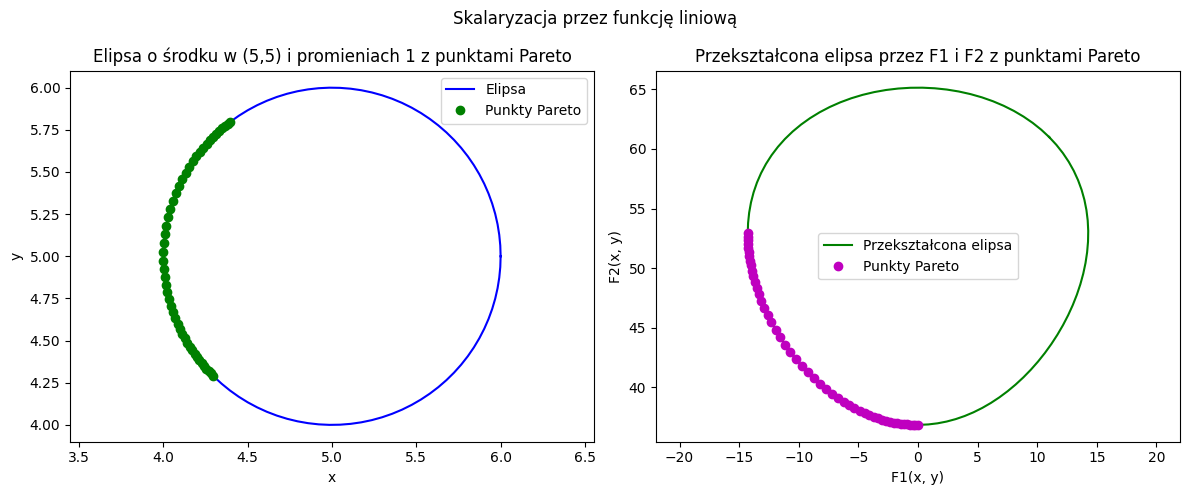

In [13]:
# Definicja wag
w1 = 0.5
w2 = 0.5


# Definicja funkcji F1 i F2
def F1(x, y):
    return x ** 2 - y ** 2

def F2(x, y):
    return x ** 2 + y ** 2

# Funkcja celu jako liniowa kombinacja F1 i F2
def objective(x, w1, w2):
    return w1 * F1(x[0], x[1]) + w2 * F2(x[0], x[1])

# Ograniczenia
# Warunki dolne i g√≥rne
bounds = [(4, 6), (4, 6)]  # Granice dolne i g√≥rne dla x i y

# Nieliniowe ograniczenie (wewnƒÖtrz okrƒôgu)
def constraint_circle(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2)

# Definicja ograniczenia
constraints = {'type': 'ineq', 'fun': constraint_circle}

# Punkt poczƒÖtkowy bliski obszaru dopuszczalnego
x0 = [5, 5]

# Generowanie zbioru Pareto
pareto_points = []
weights = np.linspace(0, 1, 50)  # Wagi od 0 do 1 dla Pareto

for w1 in weights:
    w2 = 1 - w1  # suma wag musi wynosiƒá 1
    result = minimize(objective, x0, args=(w1, w2), method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt = result.x
        pareto_points.append([F1(x_opt, y_opt), F2(x_opt, y_opt), x_opt, y_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elips
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = 5 + np.cos(theta)  # wsp√≥≈Çrzƒôdne x okrƒôgu
circle_y = 5 + np.sin(theta)  # wsp√≥≈Çrzƒôdne y okrƒôgu

# Przekszta≈Çcona elipsa przez funkcje F1 i F2
ellipse_x = 5 + np.cos(theta)
ellipse_y = 5 + np.sin(theta)
transformed_x = F1(ellipse_x, ellipse_y)  # Zastosowanie F1 na elipsie
transformed_y = F2(ellipse_x, ellipse_y)  # Zastosowanie F2 na elipsie

# Wykresy
plt.figure(figsize=(12, 5))

# Wykres okrƒôgu i zbioru Pareto
plt.subplot(1, 2, 1)
plt.plot(circle_x, circle_y, label="Elipsa", color='b')
plt.plot(pareto_points[:, 2], pareto_points[:, 3], 'go', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
plt.title("Elipsa o ≈õrodku w (5,5) i promieniach 1 z punktami Pareto")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')

# Wykres przekszta≈Çconej elipsy i zbioru Pareto
plt.subplot(1, 2, 2)
plt.plot(transformed_x, transformed_y, label="Przekszta≈Çcona elipsa", color='g')
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'mo', label="Punkty Pareto")  # Punkty Pareto na przekszta≈Çconej elipsie
plt.title("Przekszta≈Çcona elipsa przez F1 i F2 z punktami Pareto")
plt.xlabel("F1(x, y)")
plt.ylabel("F2(x, y)")
plt.legend()
plt.axis('equal')

plt.suptitle("Skalaryzacja przez funkcjƒô liniowƒÖ")
plt.tight_layout()
plt.show()


## Skalaryzacja metodƒÖ $\epsilon$ ogranicze≈Ñ.
Metoda ta polega na dobraniu jednej z nieliniowych funkcji celu, dla kt√≥rej p√≥≈∫niej bƒôdzie
wyznaczany punkt optymalny. Jednocze≈õnie dla reszty funkcji dobierane jest dodatkowe ograniczenie
postaci: $$ùêπ_2 ‚àí \epsilon ‚â§ 0$$

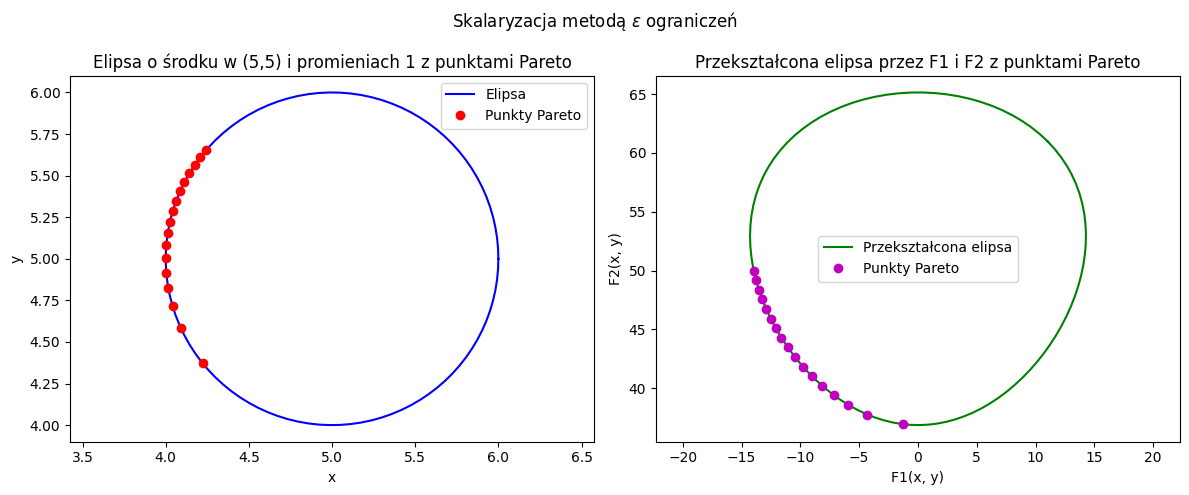

In [14]:
# Definicja funkcji F1 i F2
def F1(x, y):
    return x ** 2 - y ** 2

def F2(x, y):
    return x**2 + y**2

# Funkcja celu - minimalizujemy F1
def objective_F1(x):
    return F1(x[0], x[1])

# Ograniczenia
# Warunki dolne i g√≥rne
bounds = [(4, 6), (4, 6)]  # Granice dolne i g√≥rne dla x i y

# Nieliniowe ograniczenie (wewnƒÖtrz okrƒôgu)
def constraint_circle(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2)

# Punkt poczƒÖtkowy
x0 = [5, 5]

# Generowanie zbioru Pareto metodƒÖ epsilon-ogranicze≈Ñ
pareto_points = []
epsilon_values = np.linspace(10, 50, 50)  # R√≥≈ºne warto≈õci epsilon

for epsilon in epsilon_values:
    # Definiujemy ograniczenie dla F2 jako F2(x, y) <= epsilon
    constraint_epsilon = {'type': 'ineq', 'fun': lambda x: epsilon - F2(x[0], x[1])}
    # Ograniczenie dla okrƒôgu
    constraint_circle_dict = {'type': 'ineq', 'fun': constraint_circle}
    # Lista wszystkich ogranicze≈Ñ
    constraints = [constraint_circle_dict, constraint_epsilon]
    # RozwiƒÖzanie problemu minimalizacji dla F1 z ograniczeniem epsilon na F2
    result = minimize(objective_F1, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt = result.x
        pareto_points.append([F1(x_opt, y_opt), F2(x_opt, y_opt), x_opt, y_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elips
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = 5 + np.cos(theta)  # wsp√≥≈Çrzƒôdne x okrƒôgu
circle_y = 5 + np.sin(theta)  # wsp√≥≈Çrzƒôdne y okrƒôgu

# Przekszta≈Çcona elipsa przez funkcje F1 i F2
ellipse_x = 5 + np.cos(theta)
ellipse_y = 5 + np.sin(theta)
transformed_x = F1(ellipse_x, ellipse_y)  # Zastosowanie F1 na elipsie
transformed_y = F2(ellipse_x, ellipse_y)  # Zastosowanie F2 na elipsie

# Wykresy
plt.figure(figsize=(12, 5))

# Wykres okrƒôgu i zbioru Pareto
plt.subplot(1, 2, 1)
plt.plot(circle_x, circle_y, label="Elipsa", color='b')
plt.plot(pareto_points[:, 2], pareto_points[:, 3], 'ro', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
plt.title("Elipsa o ≈õrodku w (5,5) i promieniach 1 z punktami Pareto")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')

# Wykres przekszta≈Çconej elipsy i zbioru Pareto
plt.subplot(1, 2, 2)
plt.plot(transformed_x, transformed_y, label="Przekszta≈Çcona elipsa", color='g')
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'mo', label="Punkty Pareto")  # Punkty Pareto na przekszta≈Çconej elipsie
plt.title("Przekszta≈Çcona elipsa przez F1 i F2 z punktami Pareto")
plt.xlabel("F1(x, y)")
plt.ylabel("F2(x, y)")
plt.legend()
plt.axis('equal')

plt.suptitle(r"Skalaryzacja metodƒÖ $\epsilon$ ogranicze≈Ñ")
plt.tight_layout()
plt.show()


## Skalaryzacja przez odleg≈Ço≈õƒá od wybranego punktu dominujƒÖcego (minimalizacja odleg≈Ço≈õci)
Metoda ta polega na wyborze punktu dominujƒÖcego (idealnego) bƒôdƒÖcego punktem powsta≈Çym
poprzez po≈ÇƒÖczenie najbardziej optymalnych warto≈õci ka≈ºdego kryterium spo≈õr√≥d wszystkich
punkt√≥w. Nastƒôpnie nowƒÖ funkcjƒÖ celu jest funkcja odleg≈Ço≈õci od wyznaczonego punktu idealnego. W
tym wypadku u≈ºyta zosta≈Ça u≈ºyta metryka euklidesowa.

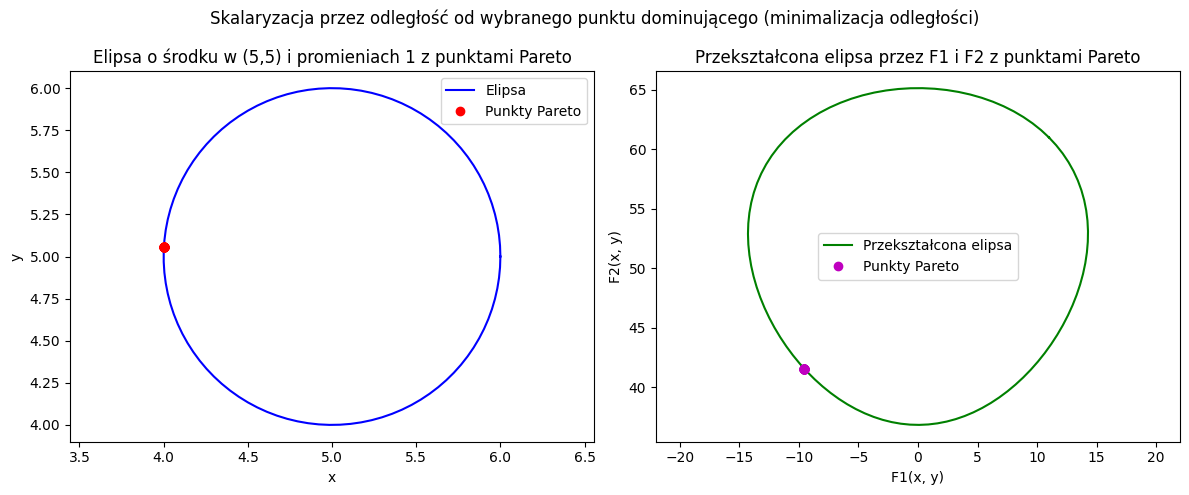

In [15]:
# Definicja funkcji F1 i F2
def F1(x, y):
    return x ** 2 - y ** 2

def F2(x, y):
    return x**2 + y**2

# Znajdowanie punktu idealnego dla F1 i F2
# Dla F1 i F2 osobno minimalizujemy warto≈õci funkcji
bounds = [(4, 6), (4, 6)]  # Granice dolne i g√≥rne dla x i y

# Minimalizacja dla F1
result_F1 = minimize(lambda x: F1(x[0], x[1]), [5, 5], method='SLSQP', bounds=bounds)
ideal_F1 = F1(result_F1.x[0], result_F1.x[1]) if result_F1.success else None

# Minimalizacja dla F2
result_F2 = minimize(lambda x: F2(x[0], x[1]), [5, 5], method='SLSQP', bounds=bounds)
ideal_F2 = F2(result_F2.x[0], result_F2.x[1]) if result_F2.success else None

# Punkt idealny w przestrzeni funkcji celu
ideal_point = np.array([ideal_F1, ideal_F2])

# Definicja funkcji celu jako odleg≈Ço≈õƒá euklidesowa od punktu idealnego
def objective_distance(x):
    F1_val = F1(x[0], x[1])
    F2_val = F2(x[0], x[1])
    return np.sqrt((F1_val - ideal_point[0])**2 + (F2_val - ideal_point[1])**2)

# Ograniczenie - okrƒÖg o ≈õrodku w (5,5) i promieniu 1
def constraint_circle(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2)

# Lista ogranicze≈Ñ
constraints = [{'type': 'ineq', 'fun': constraint_circle}]

# Punkt poczƒÖtkowy
x0 = [5, 5]

# Minimalizacja funkcji odleg≈Ço≈õci od punktu idealnego
pareto_points = []
for epsilon in np.linspace(0, 1, 50):  # U≈ºywamy r√≥≈ºnych epsilon√≥w dla bardziej szczeg√≥≈Çowego zbioru Pareto
    result = minimize(objective_distance, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt = result.x
        pareto_points.append([F1(x_opt, y_opt), F2(x_opt, y_opt), x_opt, y_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elips
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = 5 + np.cos(theta)  # wsp√≥≈Çrzƒôdne x okrƒôgu
circle_y = 5 + np.sin(theta)  # wsp√≥≈Çrzƒôdne y okrƒôgu

# Przekszta≈Çcona elipsa przez funkcje F1 i F2
ellipse_x = 5 + np.cos(theta)
ellipse_y = 5 + np.sin(theta)

transformed_x = F1(ellipse_x, ellipse_y)  # Zastosowanie F1 na elipsie
transformed_y = F2(ellipse_x, ellipse_y)  # Zastosowanie F2 na elipsie

# Wykresy
plt.figure(figsize=(12, 5))

# Wykres okrƒôgu i zbioru Pareto
plt.subplot(1, 2, 1)
plt.plot(circle_x, circle_y, label="Elipsa", color='b')
plt.plot(pareto_points[:, 2], pareto_points[:, 3], 'ro', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
plt.title("Elipsa o ≈õrodku w (5,5) i promieniach 1 z punktami Pareto")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')

# Wykres przekszta≈Çconej elipsy i zbioru Pareto
plt.subplot(1, 2, 2)
plt.plot(transformed_x, transformed_y, label="Przekszta≈Çcona elipsa", color='g')
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'mo', label="Punkty Pareto")  # Punkty Pareto na przekszta≈Çconej elipsie
plt.title("Przekszta≈Çcona elipsa przez F1 i F2 z punktami Pareto")
plt.xlabel("F1(x, y)")
plt.ylabel("F2(x, y)")
plt.legend()
plt.axis('equal')

plt.suptitle(r"Skalaryzacja przez odleg≈Ço≈õƒá od wybranego punktu dominujƒÖcego (minimalizacja odleg≈Ço≈õci)")
plt.tight_layout()
plt.show()


# Czƒô≈õƒá druga
Czƒô≈õƒá druga ƒáwiczenia polega≈Ça na analizie problemu z trzema kryteriami, gdzie co najmniej jedno jest nieliniowe. Wybrali≈õmy nastƒôpujƒÖce funkcjƒô:
$$ G_1(x, y, z) = x + y + z $$
$$ G_2(x, y, z) = x - y + z $$
$$ G_3(x, y, z) = x^2 + y^2 + z^2 $$

## Skalaryzacja przez funkcjƒô liniowƒÖ

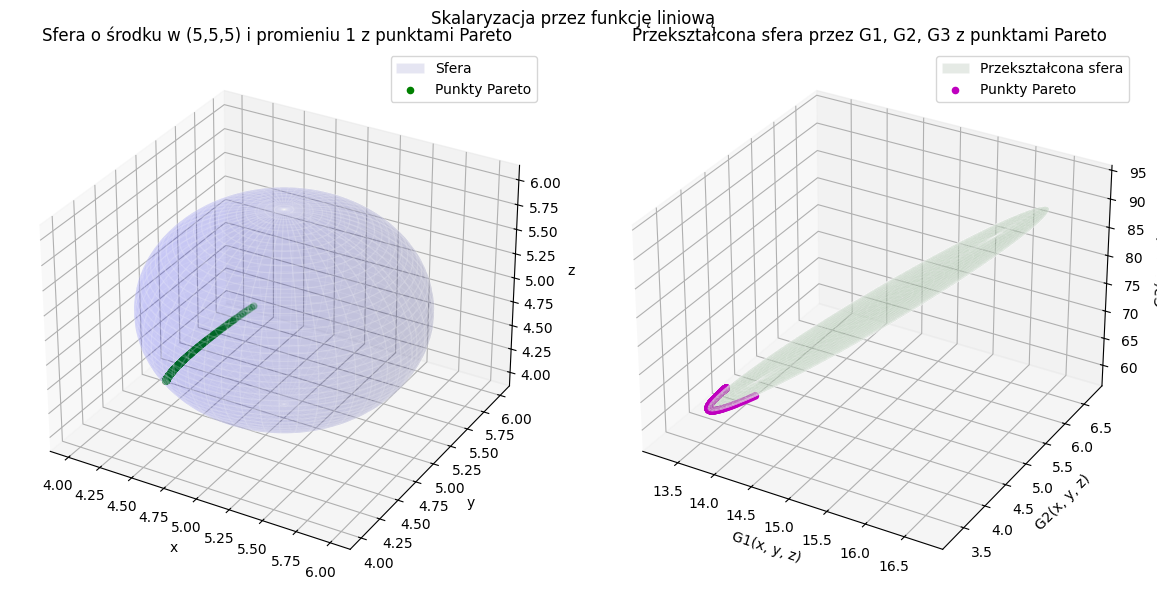

In [16]:
# Definicja wag
w1 = 0.33
w2 = 0.33
w3 = 0.34


# Definicja funkcji G1, G2 i G3
def G1(x, y, z):
    return x + y + z

def G2(x, y, z):
    return x - y + z

def G3(x, y, z):
    return x**2 + y**2 + z**2  # Nieliniowa funkcja celu

# Funkcja celu jako liniowa kombinacja G1, G2, G3
def objective(x, w1, w2, w3):
    return w1 * G1(x[0], x[1], x[2]) + w2 * G2(x[0], x[1], x[2]) + w3 * G3(x[0], x[1], x[2])

# Ograniczenia
# Warunki dolne i g√≥rne
bounds = [(4, 6), (4, 6), (4, 6)]  # Granice dolne i g√≥rne dla x, y, z

# Nieliniowe ograniczenie (wewnƒÖtrz okrƒôgu)
def constraint_sphere(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

# Definicja ograniczenia
constraints = {'type': 'ineq', 'fun': constraint_sphere}

# Punkt poczƒÖtkowy bliski obszaru dopuszczalnego
x0 = [5, 5, 5]

# Generowanie zbioru Pareto
pareto_points = []
weights = np.linspace(0, 1, 50)  # Wagi od 0 do 1 dla Pareto

for w1 in weights:
    for w2 in weights:
        w3 = 1 - w1 - w2  # suma wag musi wynosiƒá 1
        if w3 >= 0:  # Je≈õli w3 jest dodatnie, to mamy poprawnƒÖ wagƒô
            result = minimize(objective, x0, args=(w1, w2, w3), method='SLSQP', bounds=bounds, constraints=constraints)
            if result.success:
                x_opt, y_opt, z_opt = result.x
                pareto_points.append([G1(x_opt, y_opt, z_opt), G2(x_opt, y_opt, z_opt), G3(x_opt, y_opt, z_opt), x_opt, y_opt, z_opt])

pareto_points = np.array(pareto_points)

# Rysowanie sfery
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
sphere_x = 5 + np.outer(np.cos(theta), np.sin(phi))  # wsp√≥≈Çrzƒôdne x sfery
sphere_y = 5 + np.outer(np.sin(theta), np.sin(phi))  # wsp√≥≈Çrzƒôdne y sfery
sphere_z = 5 + np.outer(np.ones_like(theta), np.cos(phi))  # wsp√≥≈Çrzƒôdne z sfery

# Przekszta≈Çcone punkty przez funkcje G1, G2 i G3
transformed_x = G1(sphere_x, sphere_y, sphere_z)  # Zastosowanie G1 na sferze
transformed_y = G2(sphere_x, sphere_y, sphere_z)  # Zastosowanie G2 na sferze
transformed_z = G3(sphere_x, sphere_y, sphere_z)  # Zastosowanie G3 na sferze

# Wykresy
fig = plt.figure(figsize=(12, 6))

# Wykres sfery i zbioru Pareto
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(sphere_x, sphere_y, sphere_z, color='b', alpha=0.1, edgecolor='w', label="Sfera")
ax1.scatter(pareto_points[:, 3], pareto_points[:, 4], pareto_points[:, 5], c='g', label="Punkty Pareto")  # Punkty Pareto
ax1.set_title("Sfera o ≈õrodku w (5,5,5) i promieniu 1 z punktami Pareto")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.legend()

# Wykres przekszta≈Çconych punkt√≥w przez G1, G2 i G3
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(transformed_x, transformed_y, transformed_z, color='g', alpha=0.1, edgecolor='w', label="Przekszta≈Çcona sfera")
ax2.scatter(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], c='m', label="Punkty Pareto")  # Punkty Pareto
ax2.set_title("Przekszta≈Çcona sfera przez G1, G2, G3 z punktami Pareto")
ax2.set_xlabel("G1(x, y, z)")
ax2.set_ylabel("G2(x, y, z)")
ax2.set_zlabel("G3(x, y, z)")
ax2.legend()

plt.suptitle("Skalaryzacja przez funkcjƒô liniowƒÖ")
plt.tight_layout()
plt.show()


## Skalaryzacja metodƒÖ $\epsilon$ ogranicze≈Ñ.

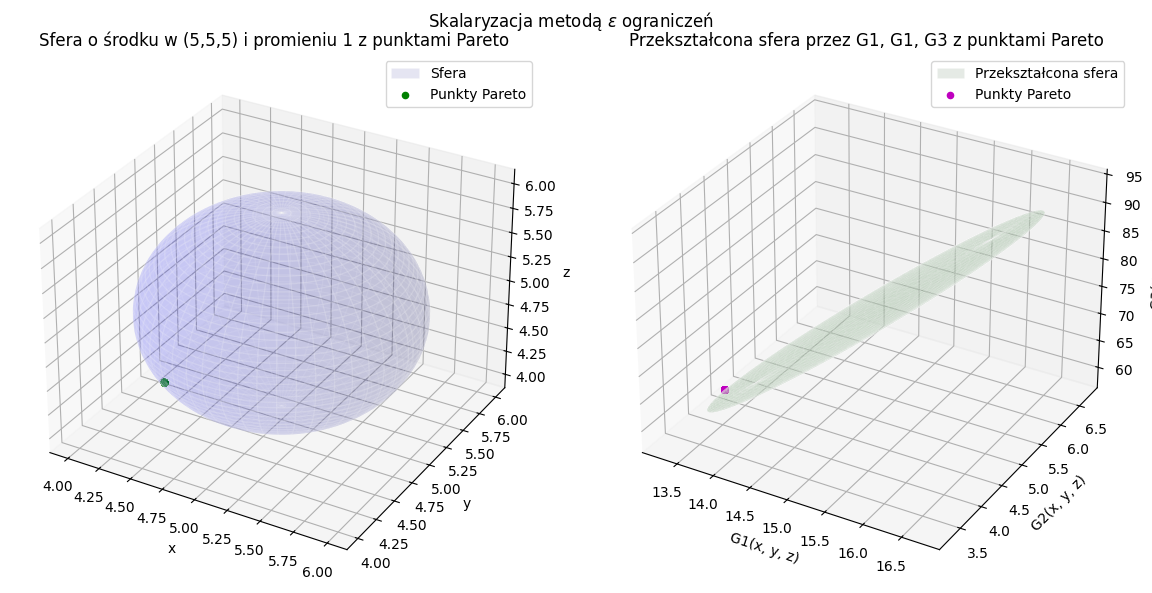

In [17]:
# Definicja funkcji G1, G2, G3
def G1(x, y, z):
    return x + y + z

def G2(x, y, z):
    return x - y + z

def G3(x, y, z):
    return x**2 + y**2 + z**2  # Nieliniowa funkcja celu

# Funkcja celu - minimalizujemy G1
def objective_G1(x):
    return G1(x[0], x[1], x[2])

# Ograniczenia
# Warunki dolne i g√≥rne
bounds = [(4, 6), (4, 6), (4, 6)]  # Granice dolne i g√≥rne dla x, y, z

# Nieliniowe ograniczenie (wewnƒÖtrz sfery)
def constraint_sphere(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

# Punkt poczƒÖtkowy
x0 = [5, 5, 5]

# Generowanie zbioru Pareto metodƒÖ epsilon-ogranicze≈Ñ
pareto_points = []
epsilon_values_G2 = np.linspace(10, 100, 50)  # Zwiƒôkszenie zakresu epsilon dla G2
epsilon_values_G3 = np.linspace(10, 100, 50)  # Zwiƒôkszenie zakresu epsilon dla G3

for epsilon_G2 in epsilon_values_G2:
    for epsilon_G3 in epsilon_values_G3:
        # Definiujemy ograniczenie dla G2 i G3 jako G2(x, y, z) <= epsilon_G2 i G3(x, y, z) <= epsilon_G3
        constraint_epsilon_G2 = {'type': 'ineq', 'fun': lambda x: epsilon_G2 - G2(x[0], x[1], x[2])}
        constraint_epsilon_G3 = {'type': 'ineq', 'fun': lambda x: epsilon_G3 - G3(x[0], x[1], x[2])}
        
        # Ograniczenie dla sfery
        constraint_sphere_dict = {'type': 'ineq', 'fun': constraint_sphere}
        
        # Lista wszystkich ogranicze≈Ñ
        constraints = [constraint_sphere_dict, constraint_epsilon_G2, constraint_epsilon_G3]
        
        # RozwiƒÖzanie problemu minimalizacji dla G1 z ograniczeniami na G2 i G3
        result = minimize(objective_G1, x0, method='SLSQP', bounds=bounds, constraints=constraints)
        if result.success:
            x_opt, y_opt, z_opt = result.x
            pareto_points.append([G1(x_opt, y_opt, z_opt), G2(x_opt, y_opt, z_opt), G3(x_opt, y_opt, z_opt), x_opt, y_opt, z_opt])


# Sprawdzamy, czy pareto_points zawiera jakiekolwiek punkty
if pareto_points:
    pareto_points = np.array(pareto_points)
else:
    print("Brak punkt√≥w Pareto!")


# Sprawdzamy, czy pareto_points zawiera jakiekolwiek punkty
if pareto_points.shape[0] == 0:
    print("Brak punkt√≥w Pareto!")
else:
    # Rysowanie sfery
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 100)
    sphere_x = 5 + np.outer(np.cos(theta), np.sin(phi))  # wsp√≥≈Çrzƒôdne x sfery
    sphere_y = 5 + np.outer(np.sin(theta), np.sin(phi))  # wsp√≥≈Çrzƒôdne y sfery
    sphere_z = 5 + np.outer(np.ones_like(theta), np.cos(phi))  # wsp√≥≈Çrzƒôdne z sfery

    # Przekszta≈Çcone punkty przez funkcje G1, G2 i G3
    transformed_x = G1(sphere_x, sphere_y, sphere_z)  # Zastosowanie G1 na sferze
    transformed_y = G2(sphere_x, sphere_y, sphere_z)  # Zastosowanie G2 na sferze
    transformed_z = G3(sphere_x, sphere_y, sphere_z)  # Zastosowanie G3 na sferze

    # Wykresy
    fig = plt.figure(figsize=(12, 6))

    # Wykres sfery i zbioru Pareto
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(sphere_x, sphere_y, sphere_z, color='b', alpha=0.1, edgecolor='w', label="Sfera")
    ax1.scatter(pareto_points[:, 3], pareto_points[:, 4], pareto_points[:, 5], c='g', label="Punkty Pareto")  # Punkty Pareto
    ax1.set_title("Sfera o ≈õrodku w (5,5,5) i promieniu 1 z punktami Pareto")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")
    ax1.legend()

    # Wykres przekszta≈Çconych punkt√≥w przez G1, G2 i G3
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(transformed_x, transformed_y, transformed_z, color='g', alpha=0.1, edgecolor='w', label="Przekszta≈Çcona sfera")
    ax2.scatter(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], c='m', label="Punkty Pareto")  # Punkty Pareto
    ax2.set_title("Przekszta≈Çcona sfera przez G1, G1, G3 z punktami Pareto")
    ax2.set_xlabel("G1(x, y, z)")
    ax2.set_ylabel("G2(x, y, z)")
    ax2.set_zlabel("G3(x, y, z)")
    ax2.legend()

    plt.suptitle(r"Skalaryzacja metodƒÖ $\epsilon$ ogranicze≈Ñ")
    plt.tight_layout()
    plt.show()


## Skalaryzacja przez odleg≈Ço≈õƒá od wybranego punktu dominujƒÖcego (minimalizacja odleg≈Ço≈õci)

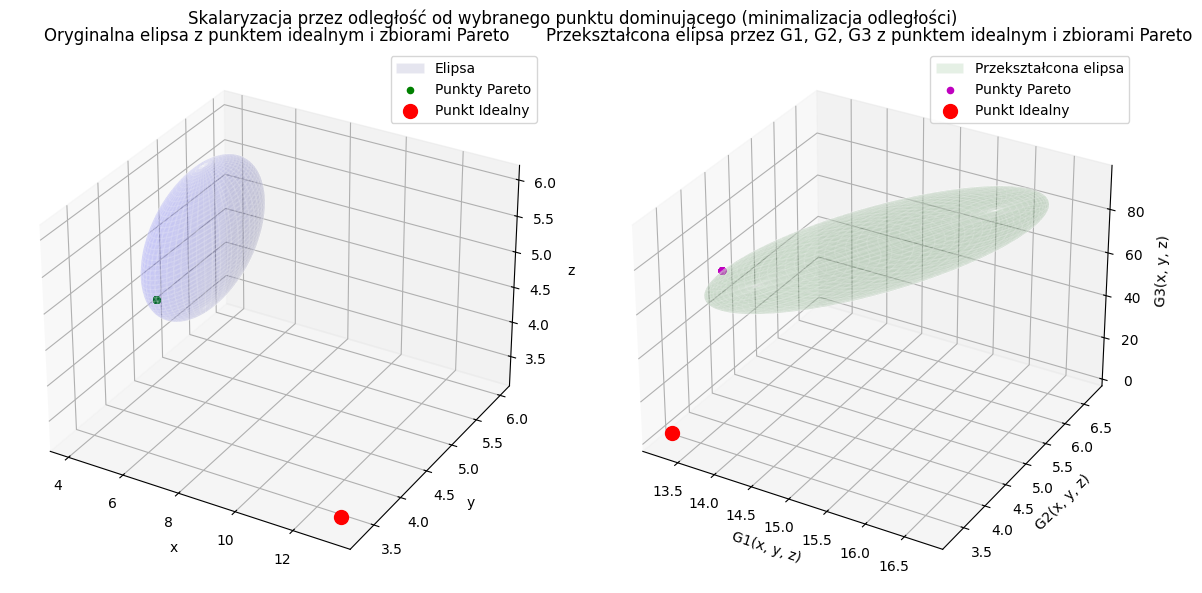

In [18]:
# Definicje funkcji celu
def G1(x, y, z):
    return x + y + z

def G2(x, y, z):
    return x - y + z

def G3(x, y, z):
    return x**2 + y**2 + z**2  # Nieliniowa funkcja celu

# Punkt poczƒÖtkowy
x0 = [5, 5, 5]

# Ograniczenia (np. kula o ≈õrodku w (5,5,5) i promieniu 1 w przestrzeni tr√≥jwymiarowej)
def constraint_sphere(x):
    return 1 - ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

# Lista ogranicze≈Ñ
constraints = [{'type': 'ineq', 'fun': constraint_sphere}]

# Granice zmiennych
bounds = [(4, 6), (4, 6), (4, 6)]  # Granice dolne i g√≥rne dla x, y i z

# Znalezienie punktu idealnego
result_G1 = minimize(lambda x: G1(x[0], x[1], x[2]), x0, method='SLSQP', bounds=bounds, constraints=constraints)
ideal_G1 = G1(result_G1.x[0], result_G1.x[1], result_G1.x[2]) if result_G1.success else None

result_G2 = minimize(lambda x: G2(x[0], x[1], x[2]), x0, method='SLSQP', bounds=bounds, constraints=constraints)
ideal_G2 = G2(result_G2.x[0], result_G2.x[1], result_G2.x[2]) if result_G2.success else None

result_G3 = minimize(lambda x: G2(x[0], x[1], x[2]), x0, method='SLSQP', bounds=bounds, constraints=constraints)
ideal_G3 = G2(result_G3.x[0], result_G3.x[1], result_G3.x[2]) if result_G3.success else None

# Punkt idealny w przestrzeni funkcji celu
ideal_point = np.array([ideal_G1, ideal_G2, ideal_G3])

# Funkcja celu minimalizujƒÖca odleg≈Ço≈õƒá euklidesowƒÖ od punktu idealnego
def objective_distance(x):
    G1_val = G1(x[0], x[1], x[2])
    G2_val = G2(x[0], x[1], x[2])
    G3_val = G3(x[0], x[1], x[2])
    return np.sqrt((G1_val - ideal_point[0])**2 + (G2_val - ideal_point[1])**2 + (G3_val - ideal_point[2])**2)

# Generowanie zbioru Pareto
pareto_points = []
for epsilon in np.linspace(0, 1, 50):
    result = minimize(objective_distance, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        x_opt, y_opt, z_opt = result.x
        pareto_points.append([G1(x_opt, y_opt, z_opt), G2(x_opt, y_opt, z_opt), G3(x_opt, y_opt, z_opt), x_opt, y_opt, z_opt])

pareto_points = np.array(pareto_points)

# Rysowanie elipsy w przestrzeni oryginalnej (ok. kula)
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
x = 5 + np.outer(np.cos(theta), np.sin(phi))  # wsp√≥≈Çrzƒôdne x kuli
y = 5 + np.outer(np.sin(theta), np.sin(phi))  # wsp√≥≈Çrzƒôdne y kuli
z = 5 + np.outer(np.ones_like(theta), np.cos(phi))  # wsp√≥≈Çrzƒôdne z kuli

# Przekszta≈Çcona elipsa przez funkcje G1, G2, i G3
transformed_x = G1(x, y, z)  # Zastosowanie G1 na elipsie
transformed_y = G2(x, y, z)  # Zastosowanie G2 na elipsie
transformed_z = G3(x, y, z)  # Zastosowanie G3 na elipsie

# Wykresy
fig = plt.figure(figsize=(12, 6))

# Wykres oryginalnej elipsy i zbioru Pareto
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, color='b', alpha=0.1, edgecolor='w', label="Elipsa")
ax1.scatter(pareto_points[:, 3], pareto_points[:, 4], pareto_points[:, 5], c='g', label="Punkty Pareto")  # Punkty Pareto na oryginalnej elipsie
ax1.scatter(ideal_point[0], ideal_point[1], ideal_point[2], c='r', s=100, label="Punkt Idealny")
ax1.set_title("Oryginalna elipsa z punktem idealnym i zbiorami Pareto")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.legend()

# Wykres przekszta≈Çconej elipsy i zbioru Pareto
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(transformed_x, transformed_y, transformed_z, color='g', alpha=0.1, edgecolor='w', label="Przekszta≈Çcona elipsa")
ax2.scatter(pareto_points[:, 0], pareto_points[:, 1], pareto_points[:, 2], c='m', label="Punkty Pareto")  # Punkty Pareto na przekszta≈Çconej elipsie
ax2.scatter(ideal_point[0], ideal_point[1], ideal_point[2], c='r', s=100, label="Punkt Idealny")
ax2.set_title("Przekszta≈Çcona elipsa przez G1, G2, G3 z punktem idealnym i zbiorami Pareto")
ax2.set_xlabel("G1(x, y, z)")
ax2.set_ylabel("G2(x, y, z)")
ax2.set_zlabel("G3(x, y, z)")
ax2.legend()

plt.suptitle(r"Skalaryzacja przez odleg≈Ço≈õƒá od wybranego punktu dominujƒÖcego (minimalizacja odleg≈Ço≈õci)")
plt.tight_layout()
plt.show()


# Wnioski
W ramach ƒáwiczenia zaimplementowano oraz sprawdzono dzia≈Çanie trzech metod skalaryzacji dla
problem√≥w optymalizacji wielokryterialnej. ZnaczƒÖcy wp≈Çyw na dzia≈Çanie tych metod ma dobranie odpowiednich parametr√≥w: 
- warto≈õci wag dla metody skalaryzacji przez funkcjƒô liniowƒÖ, 
- warto≈õci i ilo≈õƒá ogranicze≈Ñ $\epsilon$ dla drugiej metody,
- rodzaj metryki dla metody skalaryzacji przez odleg≈Ço≈õƒá od punktu idealnego. 